# Setup

In [ ]:
%pip install pyshark
%pip install nest_asyncio
%pip install pandas

In [1]:
import pandas as pd
import nest_asyncio
nest_asyncio.apply()
run_seed=0

In [2]:
import sys
sys.path.append('..')
from src.visualization.visualization import Visualization
from src.preprocessors.pcap_preprocessor import PcapPreprocessor
from tabulate import tabulate

preprocessor = PcapPreprocessor()
visualization = Visualization()

In [3]:
base_data = preprocessor.get_all_data()

# Visualization

In [ ]:
res = preprocessor.get_database_information()
datasets_info = res['datasets']
labels_info = res['labels']

In [ ]:
pd.DataFrame(datasets_info)

In [ ]:
pd.DataFrame(labels_info)

##### Get geral information

In [ ]:
print(base_data.info())

##### Get Column information

In [ ]:
visualization.column_info(base_data)

In [ ]:
# Get the columns that are common in all datasets
common_columns = visualization.find_common_columns_from_datasets(base_data)
common_columns.sort()
print(common_columns)
len(common_columns)

##### Get n first rows

In [ ]:
visualization.first_x_rows(base_data, 5)

In [ ]:
base_data.head()

##### Distribution of the datasets

In [ ]:
visualization.plot_dataset_counts(base_data)

##### Distribution of classification

In [ ]:
visualization.plot_label_counts(base_data)

##### Correlation Matrix

In [ ]:
high_correlation = visualization.plot_correlation_matrix(base_data, high_corr_threshold=0.8)
print(high_correlation)

##### Distribution of different features

In [ ]:
visualization.plot_tcp_source_ports(base_data)

In [ ]:
visualization.plot_udp_source_ports(base_data)

In [ ]:
visualization.plot_top_ip_addresses(base_data)

In [ ]:
visualization.plot_top_ip_dest_addresses(base_data)

In [ ]:
visualization.plot_tcp_flags_distribution(base_data)

In [ ]:
visualization.plot_dns_queries(base_data)

In [ ]:
visualization.plot_tcp_stream_time_series(base_data)

In [ ]:
# See distribution of the all columns
# visualization.plot_distribution(bd_data)

##### Clean the data - missing values

In [ ]:
base_data_cleaned = visualization.filter_columns_by_missing_values(base_data, 1)

In [ ]:
visualization.plot_missing_values_heatmap(base_data_cleaned)

In [4]:
threshold = 0.50

missing_percentage = visualization.calculate_missing_percentages(base_data)

# Print columns with 0% missing values
visualization.print_zero_missing_columns(missing_percentage)

# Print columns with missing values above the threshold
visualization.print_high_missing_columns(missing_percentage, threshold)

# Print table of columns with valid missing values (less than threshold)
visualization.print_valid_columns_table(missing_percentage, threshold)


Columns with 0% Missing Values: ['_id', 'dataset', 'label']
Columns with >50.0% Missing Values: ['sll.ltype', 'DATA.data', 'DATA.data_data', 'DATA.data_len', 'eth.dst_oui_resolved', 'sll.etype', 'ip.geodst_summary', 'ip.geodst_city', 'ip.geocity', 'ip.geodst_country', 'ip.geocountry', 'ip.geodst_country_iso', 'ip.geocountry_iso', 'ip.geodst_lat', 'ip.geolat', 'ip.geodst_lon', 'ip.geolon', 'tcp.window_size_scalefactor', 'tcp.options', 'tcp.options_nop', 'tcp.option_kind', 'tcp.options_timestamp', 'tcp.option_len', 'tcp.options_timestamp_tsval', 'tcp.options_timestamp_tsecr', 'tcp.analysis', 'tcp.analysis_bytes_in_flight', 'tcp.analysis_push_bytes_sent', 'tcp.payload', 'tcp.pdu_size', 'mqtt._ws_expert', 'mqtt.unknown_version', 'mqtt._ws_expert_message', 'mqtt._ws_expert_severity', 'mqtt._ws_expert_group', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.dupflag', 'mqtt.qos', 'mqtt.retain', 'mqtt.len', 'mqtt.topic_len', 'mqtt.topic', 'mqtt.msgid', 'mqtt.msg', 'icmp.type', 'icmp.code', 'icmp.checksu

Column,Missing Percentage
sll.pkttype,21.052632
sll.hatype,21.052632
sll.halen,21.052632
sll.src_eth,21.052632
sll.unused,21.052632
eth.dst,39.628421
eth.dst_resolved,39.628421
eth.dst_oui,39.628421
eth.addr,39.628421
eth.addr_resolved,39.628421


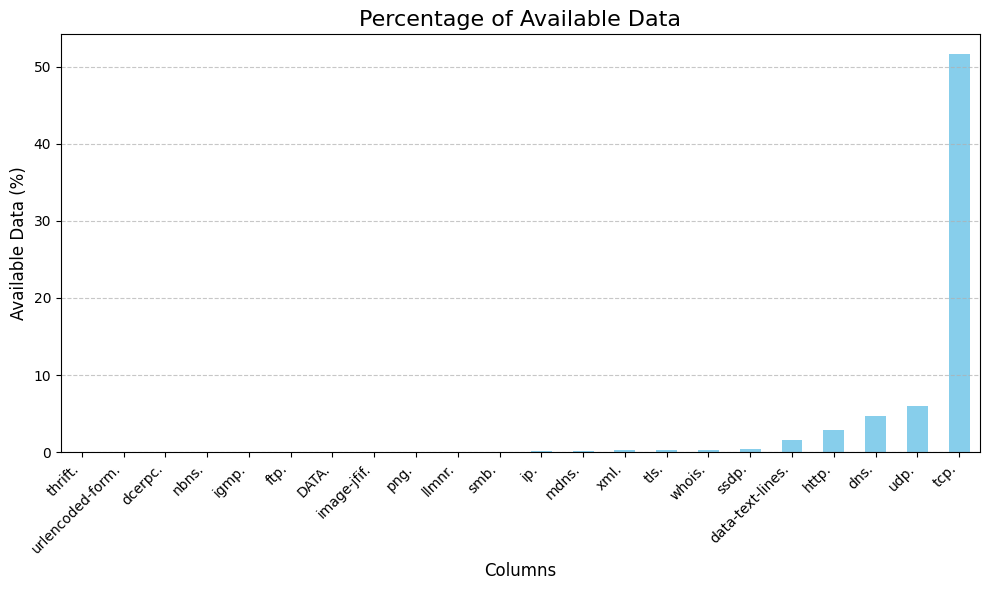

In [4]:
visualization.get_types(base_data)

verificar se as entradas dos graficos acima pertencem  aos pacotes de trafego para perceber s n ha cenas que passaram infiltradas